In [1]:
# prompt: #flower

print("꽃을_오리지날로한번")


꽃을_오리지날로한번


In [2]:
from glob import glob
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!cp '/content/drive/MyDrive/Colab Notebooks/samples/concrete_image.zip' .

In [ ]:
# AI PRO 업로드한 concrete_image.zip 파일 확인
#glob('concrete_image.zip')

In [10]:
# 이미지 폴더 있는지 확인
if not os.path.exists('src_cjk'):
    os.mkdir('src_cjk')

#concrete_image.zip 압축풀기 : 4분 소요
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/test_flower_240526/flower_photos_cjk5.zip', 'r') as zip_ref:
    zip_ref.extractall('src_cjk')

In [11]:
#(1) IMAGE/Negative 와 IMAGE/Positive에 파일 분류해서 넣기
import shutil

# 이미지 폴더 있는지 확인
if not os.path.exists('IMAGE'):
    os.mkdir('IMAGE')
if not os.path.exists('IMAGE/daisy'):
    os.mkdir('IMAGE/daisy')
if not os.path.exists('IMAGE/dandelion'):
    os.mkdir('IMAGE/dandelion')
if not os.path.exists('IMAGE/tulips'):
    os.mkdir('IMAGE/tulips')
if not os.path.exists('IMAGE/roses'):
    os.mkdir('IMAGE/roses')
if not os.path.exists('IMAGE/sunflowers'):
    os.mkdir('IMAGE/sunflowers')

count=0
for filename in os.listdir("src_cjk/cjk_src"):
    if filename.endswith('.jpg'):
        label=filename.split("_")[-1].split(".")[0]
        if(label=="daisy"):
          shutil.copy(os.path.join("src_cjk/cjk_src", filename), os.path.join("IMAGE/daisy", filename))
        elif(label=="dandelion"):
          shutil.copy(os.path.join("src_cjk/cjk_src", filename), os.path.join("IMAGE/dandelion", filename))
        elif(label=="tulips"):
          shutil.copy(os.path.join("src_cjk/cjk_src", filename), os.path.join("IMAGE/tulips", filename))
        elif(label=="roses"):
          shutil.copy(os.path.join("src_cjk/cjk_src", filename), os.path.join("IMAGE/roses", filename))
        elif(label=="sunflowers"):
          shutil.copy(os.path.join("src_cjk/cjk_src", filename), os.path.join("IMAGE/sunflowers", filename))


        #shutil.copy(os.path.join(src_folder, filename), os.path.join(src_target, new_filename))

# 새 섹션

In [11]:
# 약 3,700장의 꽃 사진 데이터세트를 사용합니다.
# 아래 데이터 가져오기 그냥 사용합니다.
'''
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
'''

'\nimport pathlib\ndataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"\ndata_dir = tf.keras.utils.get_file(\'flower_photos\', origin=dataset_url, untar=True)\ndata_dir = pathlib.Path(data_dir)\n'

In [12]:
# 이미지 패스 확인
#data_dir

In [13]:
# 이미지 폴더 밑의 폴더 확인
#!ls -l /root/.keras/datasets/flower_photos/
!ls -l IMAGE/

total 236
drwxr-xr-x 2 root root 36864 May 26 09:25 daisy
drwxr-xr-x 2 root root 57344 May 26 09:25 dandelion
drwxr-xr-x 2 root root 36864 May 26 09:25 roses
drwxr-xr-x 2 root root 45056 May 26 09:25 sunflowers
drwxr-xr-x 2 root root 45056 May 26 09:25 tulips


In [14]:
# daisy 폴더 안의 이지미 갯수
!ls -l IMAGE/daisy | grep jpg | wc -l

613


In [15]:
# 이미지 패스 지정
img_path = 'IMAGE'

In [16]:
#3.. 이미지 파일 하나 읽어 이미지 보기

In [19]:
# Hyperparameter Tunning

num_epochs = 4
batch_size =32

learning_rate = 0.001
dropout_rate = 0.5

input_shape = (224, 224, 3)  # 사이즈 확인
num_classes = 5    #  다섯 가지의 꽃 종류

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
#ImageDataGenerator 와 flow_from_directory 기능
#mageDataGenerator : 이미지 데이터에 대해 scaling, augmentation, validation_split 전처리 기능 수행
#flow_from_directory : 실제 이미지 데이터 읽고 배치, 셔플하고 labeling 수행

In [22]:
# ImageDataGenerator 이용하여 이미지 전처리하기
# 1개 IMAGE 폴더로 Train, Test dataset으로 나누어야 되므로 validation_split 사용해야 함
# 여기서는 data augmentation 하지 않음 : 주석처리 했으며 필요하면 주석해체하여 사용하면 됨
# validation 데이터 사이즈 입력 : validation_split=0.2 --> 20%
# (주의점) MobileNetV2에 인풋으로 사용하기 전에 전 처리하는 코드가 preprocess_input으로 함수화 되어 있습니다. 따라서 그대로 사용하시면 됩니다.
# 그래서 rescale 수행하지 않음

image_datagen = ImageDataGenerator(
      #rescale=1. / 255,        # MobileNetV2 경우, 아래 preprocess_input 호출해서 리스케일 하므로 커멘트 처리함
      validation_split=0.2,     # train set : valid set = 8 : 2
      preprocessing_function = preprocess_input  # MobileNetV2 사용한다면 전처리 코드를 넣어 주면 됩니다.
#       rotation_range=30,
#       width_shift_range=0.1,
#       height_shift_range=0.1,
#       shear_range=0.1,
#       zoom_range=0.1,
#       horizontal_flip=True,
#       fill_mode='nearest'
    )

In [25]:
# 이미지 폴더 내의 데이터  읽고 배치 , 셔플하고 labeling 수행
# 실제로 1개 IMAGE 폴더에서 Train 32000건, Test 8000건 dataset 만듬
# 2개 Class에 대한 라벨링(라벨인코딩,원핫인코딩) 수행
# MobileNetV2은 [96, 128, 160, 192, 224] 사이즈만 지원하므로 flow_from_directory 함수에서 사이즈 변경함
# subset = 'training' --> training_generator 생성
# subset = 'validation' --> test_generator 생성

# IMAGE 폴더 밑에 .ipynb_checkpoints 폴더 있을경우 폴데 삭제
!rm -rf ./IMAGE/.ipynb_checkpoints

training_generator = image_datagen.flow_from_directory(
    img_path,
    batch_size=batch_size,
    target_size=(224, 224),       # 원하는 출력 사이즈 입력. MobileNetV2 위해 사이즈 변경 : 227,227 --> 224,224. 최종 출력 : (224,224,3)
    class_mode = 'categorical',   # binary , categorical
    #class_mode = 'binary',   # binary , categorical  좀 이상항
    shuffle = True,
    subset = 'training'           # training, validation. ImageDataGenerator의 validation_split 사용하므로 subset 지정
    )

test_generator = image_datagen.flow_from_directory(
    img_path,
    batch_size=batch_size,
    target_size=(224, 224),       # 원하는 출력 사이즈 입력. MobileNetV2 위해 사이즈 변경 : 227,227 --> 224,224. 최종 출력 : (224,224,3)
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'validation'         # training, validation. ImageDataGenerator의 validation_split 사용하므로 subset 지정
    )

Found 2859 images belonging to 5 classes.
Found 711 images belonging to 5 classes.


In [26]:
# class 이름 및 번호 매핑 확인
print(training_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


One Hot Encoding :  [0. 0. 1. 0. 0.]
(224, 224, 3)


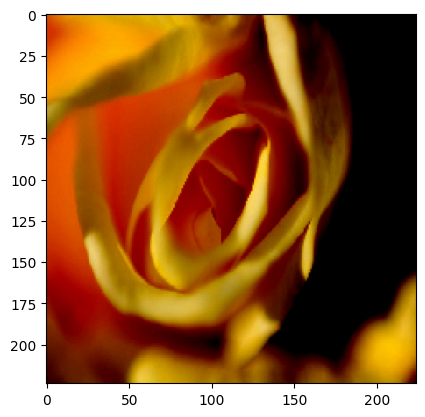

In [27]:
batch_samples = next(iter(training_generator))

print('One Hot Encoding : ',batch_samples[1][0])
print(batch_samples[0][0].shape)
plt.imshow(batch_samples[0][0])
plt.show()

In [ ]:
for a, b in training_generator:  #진짜 여기는 원핫이네.. 그러면 catergorical이 맞겠네..
  print(b)
  break

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [28]:
# 사전 훈련된 모델 MobileNet V2에서 기본 모델을 생성합니다.
# 아래와 같은 형식을 Transfer Learning 사용하며 됩니다. 우리는 그냥 불러다 사용할줄 알면 됩니다.

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [29]:
len(base_model.layers)

154

In [30]:
# MobileNet V2 베이스 모델 고정하기
base_model.trainable = False

In [31]:
# 모델 구축

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # 3차원(7, 7, 1280) --> 1차원(1280)으로 줄이기
output = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [32]:
# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function
              metrics=['accuracy'])             # Metrics / Accuracy

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

# ModelCheckpoint
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)
# ReduceLROnPlateau
lrReducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [34]:
# ImageDataGenerator 와 flow_from_directory 이용하여 DataSet을 만들었으며
# num_epochs = 10
# batch_size = 32
# (참고) steps_per_epoch , validation_steps 하이퍼 파라미터 쓰지 말자 --> 에러 자주 발생. batch_size 사용하자

history = model.fit(
    training_generator,
    validation_data = test_generator,
    epochs=num_epochs,
    # steps_per_epoch = len(training_generator) // batch_size,  # 32 is the batch_size
    # validation_steps = len(test_generator) // batch_size,
    batch_size = batch_size,
    callbacks=[es, checkpoint, lrReducer]
)

Epoch 1/4
90/90 [==============================] - ETA: 0s - loss: 0.7659 - accuracy: 0.7212
Epoch 1: val_loss improved from inf to 0.44484, saving model to my_checkpoint.ckpt
90/90 [==============================] - 21s 174ms/step - loss: 0.7659 - accuracy: 0.7212 - val_loss: 0.4448 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 2/4
90/90 [==============================] - ETA: 0s - loss: 0.3654 - accuracy: 0.8877
Epoch 2: val_loss improved from 0.44484 to 0.36696, saving model to my_checkpoint.ckpt
90/90 [==============================] - 11s 121ms/step - loss: 0.3654 - accuracy: 0.8877 - val_loss: 0.3670 - val_accuracy: 0.8734 - lr: 0.0010
Epoch 3/4
90/90 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.9133
Epoch 3: val_loss improved from 0.36696 to 0.35947, saving model to my_checkpoint.ckpt
90/90 [==============================] - 11s 117ms/step - loss: 0.2818 - accuracy: 0.9133 - val_loss: 0.3595 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 4/4
90/90 [============

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

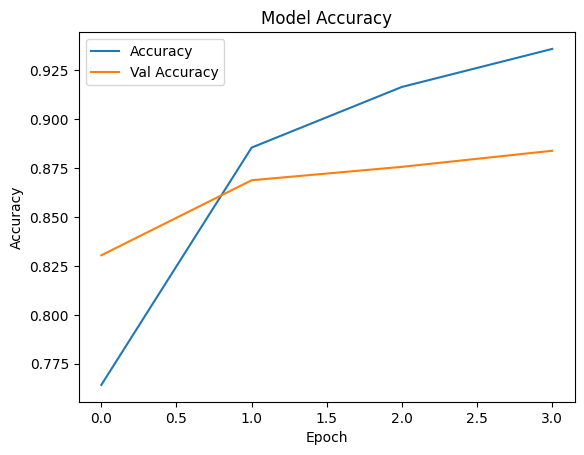

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [ ]:
# test_generator 샘플 데이터 가져오기
# 배치 사이즈 32 확인

batch_img, batch_label = next(iter(test_generator))  #하나만 가지고 온다...
print(batch_img.shape)
print(batch_label.shape)

(32, 224, 224, 3)
(32, 5)


In [ ]:
# 이미지 rescale 되어 있는 상태
batch_img[0][0][:10]

array([[-0.79607844, -0.88235295, -0.36470586],
       [-0.79607844, -0.8745098 , -0.38039213],
       [-0.79607844, -0.8745098 , -0.38039213],
       [-0.7882353 , -0.8666667 , -0.38823527],
       [-0.8039216 , -0.8745098 , -0.38039213],
       [-0.8039216 , -0.8745098 , -0.38039213],
       [-0.8117647 , -0.88235295, -0.38823527],
       [-0.8039216 , -0.88235295, -0.40392154],
       [-0.79607844, -0.8745098 , -0.38039213],
       [-0.8039216 , -0.8745098 , -0.38039213]], dtype=float32)

In [ ]:
model_name='flower_10012140_240526.ckpt'

In [35]:
#학습이 끝난 모델 저장하기
#model.save('my_checkpoint.ckpt')
model.save(model_name)

In [48]:
#구글드라이브에 저장
shutil.copytree('/content/'+model_name, '/content/drive/MyDrive/Colab Notebooks/test_flower_240526/'+model_name)

'/content/drive/MyDrive/Colab Notebooks/test_flower_240526/flower_10012140_240526.ckpt'

### **정답 맞춰보기**

In [5]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
model_name='flower_10012140_240526.ckpt'

In [7]:
# 저장된 모델 불러오기
#loaded_model = tf.keras.models.load_model('my_checkpoint.ckpt')
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/test_flower_240526/'+model_name)

In [12]:
# 시험환경 준비하기..
#정답지 pandas만들고 csv로 만들기
import os
import pandas as pd
target=[]
label=[]
result=[]
for item in os.listdir("src_cjk/cjk_test"):
  target.append(item.split(".")[0])
  if(item.split("_")[-1].split(".")[0]=="daisy"):
    label.append('daisy')
  elif(item.split("_")[-1].split(".")[0]=="dandelion"):
    label.append('dandelion')
  elif(item.split("_")[-1].split(".")[0]=="roses"):
    label.append('roses')
  elif(item.split("_")[-1].split(".")[0]=="sunflowers"):
    label.append('sunflowers')
  elif(item.split("_")[-1].split(".")[0]=="tulips"):
    label.append('tulips')
  result.append("")

df = pd.DataFrame({"target":target, "label":label, "result":result})

In [13]:
df.to_csv("test.csv")

In [15]:
final=pd.read_csv("test.csv")

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

#answer_class={'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
answer_class={0:'daisy', 1:'dandelion', 2:'roses',3:'sunflowers',4:'tulips'}


In [43]:
right=0
total=0
for image,label in zip(final['target'],final['label']):
  total+=1
  test_image_path="src_cjk/cjk_test/"+image+".jpg"
  img = load_img(test_image_path, target_size=(224, 224))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  # 예측 수행
  predictions = loaded_model.predict(img_array)
  print(predictions)
  # 예측 결과 해석

  predicted_class = np.argmax(predictions, axis=1)
  print(predicted_class)
  confidence = np.max(predictions, axis=1)
  #print(confidence)

  # 클래스 인덱스를 클래스 이름으로 매핑
  #class_indices = training_generator.class_indices
  #class_names = {v: k for k, v in class_indices.items()}
  pred=answer_class[predicted_class[0]]
  print(image,label,end=":")
  print(pred,end="||")
  print(confidence)
  #plt.imshow(img)
  #plt.show()
  if(label==pred):
    right+=1
print("점수는 :"+str(right/total*100)+"점")



1/1 [==============================] - 0s 109ms/step
[[0.0069096  0.2755922  0.66532606 0.02126017 0.03091192]]
[2]
img_00026_dandelion dandelion:roses||[0.66532606]
1/1 [==============================] - 0s 95ms/step
[[4.0277105e-06 1.0749240e-05 5.6852715e-04 6.7295446e-06 9.9941003e-01]]
[4]
img_00019_tulips tulips:tulips||[0.99941003]
1/1 [==============================] - 0s 64ms/step
[[1.5584106e-04 2.3910785e-05 9.2188895e-02 6.4040814e-04 9.0699095e-01]]
[4]
img_00034_tulips tulips:tulips||[0.90699095]
1/1 [==============================] - 0s 56ms/step
[[3.4284887e-03 9.9173319e-01 5.6275219e-04 3.9622933e-03 3.1330541e-04]]
[1]
img_00033_dandelion dandelion:dandelion||[0.9917332]
1/1 [==============================] - 0s 53ms/step
[[0.88528943 0.00165339 0.04999277 0.03799548 0.0250689 ]]
[0]
img_00033_daisy daisy:daisy||[0.88528943]
1/1 [==============================] - 0s 54ms/step
[[0.01749848 0.00079383 0.33795238 0.6089201  0.03483524]]
[3]
img_00034_sunflowers sunflowe